In [1]:
#https://medium.com/codex/how-much-bitcoin-should-you-reasonably-own-ae9b66cfb3d
import yfinance as yf
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
from pandas_datareader import data as web
from functools import reduce
from pycoingecko import CoinGeckoAPI

In [2]:
start = datetime(2020, 1, 1)
start_UNIX = datetime.timestamp(start)
end =  datetime.now()
end_UNIX = datetime.timestamp(end)
end_UNIX

1655658114.769113

In [3]:
ids = ['bitcoin', 'ethereum','solana', 'chainlink','balancer']

In [4]:
cg = CoinGeckoAPI()
timePeriod = 752
data = {}
for coin in ids:
    try:
        nested_lists = cg.get_coin_market_chart_by_id(
            id=coin, vs_currency="usd", days=timePeriod
        )["prices"]
        data[coin] = {}
        data[coin]["timestamps"], data[coin]["values"] = zip(*nested_lists)
    except Exception as e:
        print(e)
        print("coin: " + coin)

frame_list = [
    pd.DataFrame(data[coin]["values"], index=data[coin]["timestamps"], columns=[coin])
    for coin in ids
    if coin in data]

In [5]:
df_cryptocurrency = pd.concat(frame_list, axis=1).sort_index()
df_cryptocurrency["datetime"] = pd.to_datetime(df_cryptocurrency.index, unit="ms")
df_cryptocurrency["date"] = df_cryptocurrency["datetime"].dt.date
df_cryptocurrency = df_cryptocurrency.drop(['datetime'], axis=1)
df = df_cryptocurrency.set_index('date')

In [6]:
df = df.dropna()

In [7]:
df.head()

,bitcoin,ethereum,solana,chainlink,balancer
date,,,,,
2020-06-23,9678.683209,243.364710,0.727173,4.475600,15.197398
2020-06-24,9624.684292,243.079482,0.706734,4.795879,15.197398
2020-06-25,9288.061774,234.564985,0.736245,4.705963,13.668269
2020-06-26,9258.667161,232.648703,0.712689,4.807738,17.349714
2020-06-27,9166.486360,229.636526,0.740721,4.682124,12.260610


In [8]:
df.corr()

,bitcoin,ethereum,solana,chainlink,balancer
bitcoin,1.000000,0.857240,0.647764,0.794006,0.556573
ethereum,0.857240,1.000000,0.878309,0.607292,0.223169
solana,0.647764,0.878309,1.000000,0.347003,-0.076069
chainlink,0.794006,0.607292,0.347003,1.000000,0.835214
balancer,0.556573,0.223169,-0.076069,0.835214,1.000000


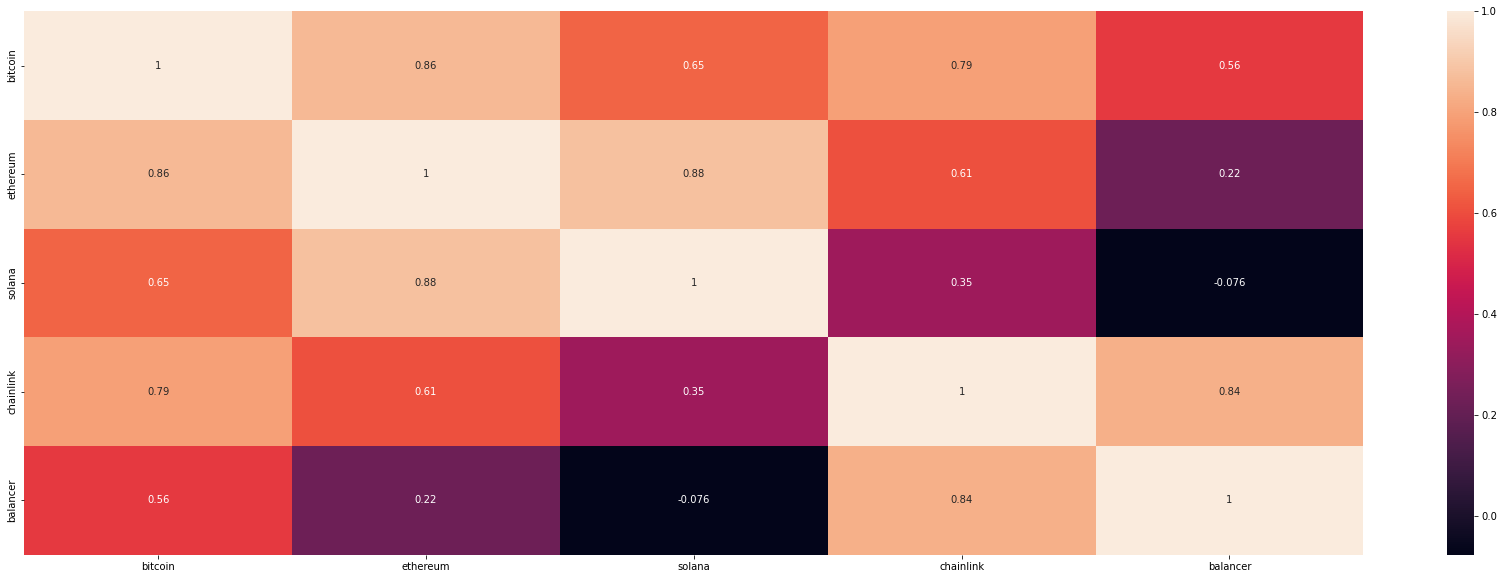

In [9]:
df_corr = df.corr()
f = plt.figure(figsize=(30, 10))
sns.heatmap(df_corr, annot=True)
plt.show()

In [10]:
df = df.reset_index()

In [11]:
pivot_price = df.melt(id_vars='date', var_name = 'Asset', value_name = 'Price')

In [12]:
pivot_price = pivot_price.dropna()

In [13]:
pivot_price['date'] = pd.to_datetime(pivot_price['date'])

In [14]:
pivot_price.dtypes

date     datetime64[ns]
Asset            object
Price           float64
dtype: object

In [15]:
pivot_price.tail()

,date,Asset,Price
3630,2022-06-15,balancer,4.751955
3631,2022-06-16,balancer,4.849493
3632,2022-06-17,balancer,4.184690
3633,2022-06-18,balancer,4.321418
3634,2022-06-19,balancer,3.955828


In [16]:
df = df.set_index('date')

In [17]:
df

,bitcoin,ethereum,solana,chainlink,balancer
date,,,,,
2020-06-23,9678.683209,243.364710,0.727173,4.475600,15.197398
2020-06-24,9624.684292,243.079482,0.706734,4.795879,15.197398
2020-06-25,9288.061774,234.564985,0.736245,4.705963,13.668269
2020-06-26,9258.667161,232.648703,0.712689,4.807738,17.349714
2020-06-27,9166.486360,229.636526,0.740721,4.682124,12.260610
...,...,...,...,...,...
2022-06-15,22244.848968,1214.866265,29.716788,6.689688,4.751955
2022-06-16,22529.198115,1230.364335,34.488081,7.330782,4.849493
2022-06-17,20408.690491,1068.603575,30.070683,6.329825,4.184690


In [18]:
returns = np.log(df / df.shift(1))

In [19]:
returns

,bitcoin,ethereum,solana,chainlink,balancer
date,,,,,
2020-06-23,NaN,NaN,NaN,NaN,NaN
2020-06-24,-0.005595,-0.001173,-0.028511,0.069117,0.000000
2020-06-25,-0.035601,-0.035656,0.040909,-0.018927,-0.106047
2020-06-26,-0.003170,-0.008203,-0.032518,0.021396,0.238499
2020-06-27,-0.010006,-0.013032,0.038578,-0.026475,-0.347184
...,...,...,...,...,...
2022-06-15,-0.012549,0.007661,0.052640,0.130071,-0.023130
2022-06-16,0.012702,0.012676,0.148902,0.091515,0.020318
2022-06-17,-0.098851,-0.140958,-0.137063,-0.146810,-0.147442


In [20]:
print("annualized returns:")
print((returns[['bitcoin']].mean() * 360).to_string())
print((returns[['ethereum']].mean() * 360).to_string())
print((returns[['solana']].mean() * 360).to_string())
print((returns[['chainlink']].mean() * 360).to_string())
print((returns[['balancer']].mean() * 360).to_string())

annualized returns:
bitcoin    0.335705
ethereum    0.698398
solana    1.873716
chainlink    0.141401
balancer   -0.667405


In [ ]:
print("standard deviation (risk):")
print((returns[['bitcoin']].std() * 360 ** 0.05).to_string())
print((returns[['ethereum']].std() * 360 ** 0.05).to_string())
print((returns[['solana']].std() * 360 ** 0.05).to_string())
print((returns[['chainlink']].std() * 360 ** 0.05).to_string())
print((returns[['balancer']].std() * 360 ** 0.05).to_string())

standard deviation (risk):
bitcoin    0.050668
ethereum    0.066867
solana    0.111264
chainlink    0.09184
balancer    0.100057


In [ ]:
corr_matrix = returns.corr()
corr_matrix

,bitcoin,ethereum,solana,chainlink,balancer
bitcoin,1.000000,0.793789,0.423252,0.650740,0.593483
ethereum,0.793789,1.000000,0.554203,0.767572,0.726714
solana,0.423252,0.554203,1.000000,0.526070,0.457355
chainlink,0.650740,0.767572,0.526070,1.000000,0.682133
balancer,0.593483,0.726714,0.457355,0.682133,1.000000


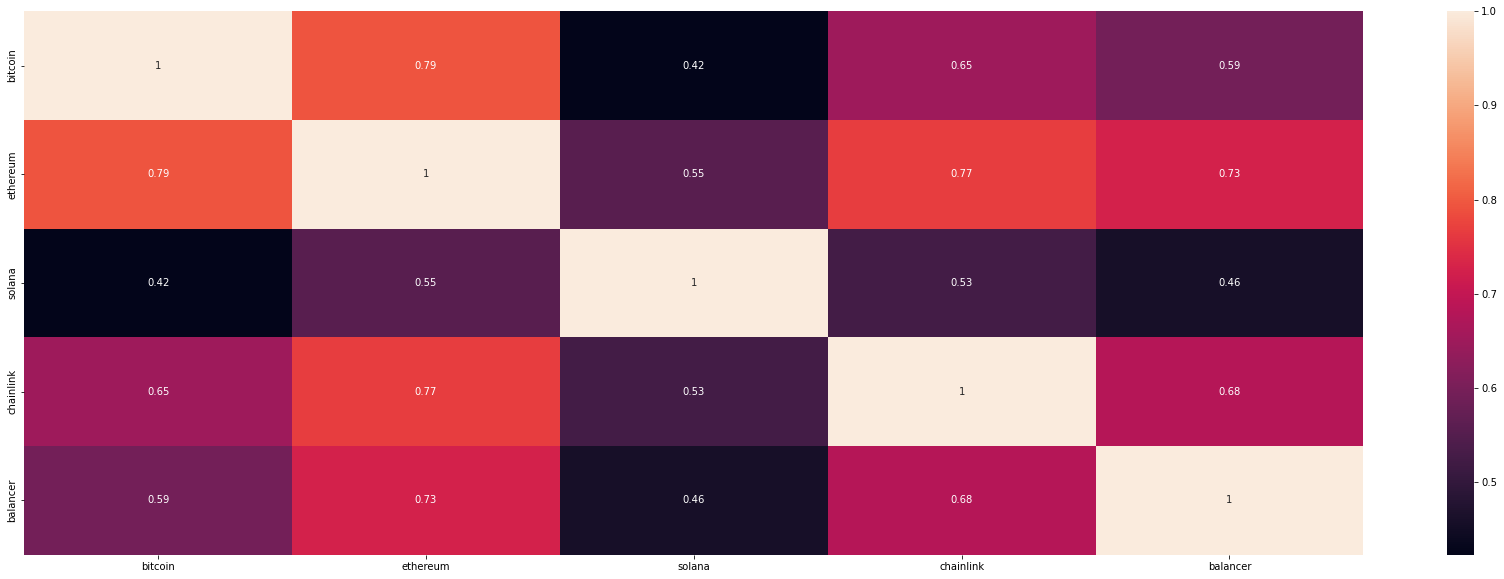

In [ ]:
f = plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

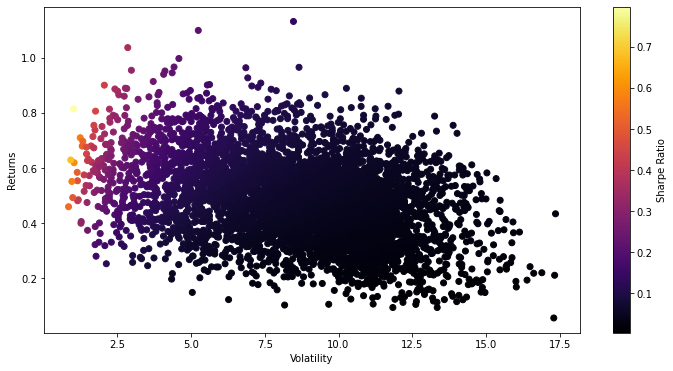

In [25]:
rF = 0.0016 # Assume risk free rate is 0.16%
number_of_portfolios = 5000

# Initialize new variables to populate with the results of the simulation.
portfolio_returns = []
portfolio_risk = []
sharpe_ratio_portfolio = []
portfolio_weights = []

# Create a loop with number of iterations equal to the number of portfolios.
for i in range(number_of_portfolios):
    weights = np.random.random_sample((len(ids)))
    weights = weights/np.sum(weights) # make weights sum to 1
    
    #annualized return based on the asset allocation
    annualized_return = np.sum(pd.concat([pd.Series(returns[['bitcoin']].mean() * weights[0] * 365), 
                                          pd.Series(returns[['ethereum']].mean() * weights[1] * 365), 
                                          pd.Series(returns[['solana']].mean() * weights[3] * 365),
                                          pd.Series(returns[['chainlink']].mean() * weights[3] * 365),
                                          pd.Series(returns[['balancer']].mean() * weights[3] * 365)]))
                        
    portfolio_returns.append(annualized_return) #save returns for each specific portfolio into our list
    
    #calculate variance/risk
    matrix_covariance = returns.cov()
    matrix_covariance['bitcoin'] = matrix_covariance['bitcoin'] * 365
    matrix_covariance['ethereum'] = matrix_covariance['ethereum'] * 365
    matrix_covariance['solana'] = matrix_covariance['solana'] * 365
    matrix_covariance['chainlink'] = matrix_covariance['chainlink'] * 365
    matrix_covariance['balancer'] = matrix_covariance['chainlink'] * 365
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights))
    portfolio_std = np.sqrt(portfolio_variance)
    #Risk is std
    portfolio_risk.append(portfolio_std)
    
    #calculate Sharpe Ratio
    sharpe_ratio = ((annualized_return - rF) /portfolio_std)
    sharpe_ratio_portfolio.append(sharpe_ratio)
    
    #store weights, because we're interested in the weights of the portfolio with the
    #highest Sharpe ratio
    portfolio_weights.append(weights)
    
portfolio_returns = np.array(portfolio_returns)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio_portfolio = np.array(sharpe_ratio_portfolio)

# Plot all of the portfolio risk vs return to demonstrate the Efficient Frontier.
# Note also that the color bar varies with Sharpe Ratio, to show the "best" portfolios.
plt.figure(figsize = (12,6))
plt.scatter(portfolio_risk, portfolio_returns, c = portfolio_returns / portfolio_risk, cmap = 'inferno')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label = 'Sharpe Ratio')

# Save the portfolio metrics into a dataframe for further exploration.
portfolio_metrics = [portfolio_returns, portfolio_risk, sharpe_ratio_portfolio, portfolio_weights]
portfolio_dfs = pd.DataFrame(portfolio_metrics)
portfolio_dfs = portfolio_dfs.T
portfolio_dfs.columns = ['Returns', 'Risk', 'Sharpe Ratio', 'Weights']

# Find the portfolio with the highest Sharpe Ratio
portfolio_dfs[['Returns', 'Risk', 'Sharpe Ratio']] = portfolio_dfs[['Returns', 'Risk', 'Sharpe Ratio']].astype(float)
highest_sharpe_ratio = portfolio_dfs.iloc[portfolio_dfs['Sharpe Ratio'].idxmax()]

# Find the portfolio with the highest returns
max_returns = portfolio_dfs.iloc[portfolio_dfs['Returns'].idxmax()]

# Find the portfolio with the lowest risk
min_risk = portfolio_dfs.iloc[portfolio_dfs['Risk'].idxmin()]

In [26]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
portfolio_dfs.describe()

,Returns,Risk,Sharpe Ratio
count,5000.000000,5000.000000,5000.000000
mean,0.480810,8.721438,0.069425
std,0.145182,2.881600,0.058075
min,0.055957,0.851206,0.003143
25%,0.380807,6.754663,0.038380
50%,0.480462,9.056807,0.053050
75%,0.576583,10.816053,0.078769
max,1.131727,17.352581,0.796554


In [27]:
df.head()

,bitcoin,ethereum,solana,chainlink,balancer
date,,,,,
2020-06-23,9678.683209,243.364710,0.727173,4.475600,15.197398
2020-06-24,9624.684292,243.079482,0.706734,4.795879,15.197398
2020-06-25,9288.061774,234.564985,0.736245,4.705963,13.668269
2020-06-26,9258.667161,232.648703,0.712689,4.807738,17.349714
2020-06-27,9166.486360,229.636526,0.740721,4.682124,12.260610


In [28]:
highest_share_ratio = portfolio_dfs.iloc[portfolio_dfs['Sharpe Ratio'].idxmax()]
highest_sharpe_ratio

Returns                                                                                                          0.814482
Risk                                                                                                             1.020499
Sharpe Ratio                                                                                                     0.796554
Weights         [0.20654770604463385, 0.2131455128937397, 0.1460369423107421, 0.4341624295368701, 0.00010740921401420726]
Name: 2340, dtype: object

In [29]:
min_risk = portfolio_dfs.iloc[portfolio_dfs['Risk'].idxmin()]
min_risk

Returns                                                                                                           0.459604
Risk                                                                                                              0.851206
Sharpe Ratio                                                                                                      0.538065
Weights         [0.7145065849593709, 0.14410140049014103, 0.05717502640088948, 0.08370082351799307, 0.0005161646316053834]
Name: 4664, dtype: object

In [30]:
max_risk = portfolio_dfs.iloc[portfolio_dfs['Risk'].idxmax()]
max_risk.head()

Returns                                                                                                          0.433978
Risk                                                                                                            17.352581
Sharpe Ratio                                                                                                     0.024917
Weights         [0.014263229475731486, 0.047418870741384546, 0.04529134090550931, 0.2894745214639445, 0.6035520374134301]
Name: 2639, dtype: object

In [31]:
max_return = portfolio_dfs.iloc[portfolio_dfs['Returns'].idxmax()]
max_return.head()

Returns                                                                                                          1.131727
Risk                                                                                                             8.472568
Sharpe Ratio                                                                                                     0.133387
Weights         [0.0024794787059334287, 0.0353589228267055, 0.03278735907266261, 0.8092959427584556, 0.12007829663624295]
Name: 1639, dtype: object

In [32]:
min_return = portfolio_dfs.iloc[portfolio_dfs['Returns'].idxmin()]
min_return.head()

Returns                                                                                                          0.055957
Risk                                                                                                            17.293604
Sharpe Ratio                                                                                                     0.003143
Weights         [0.016128136355118297, 0.008882086110508565, 0.2728590130050823, 0.03233099318048744, 0.6697997713488034]
Name: 4796, dtype: object

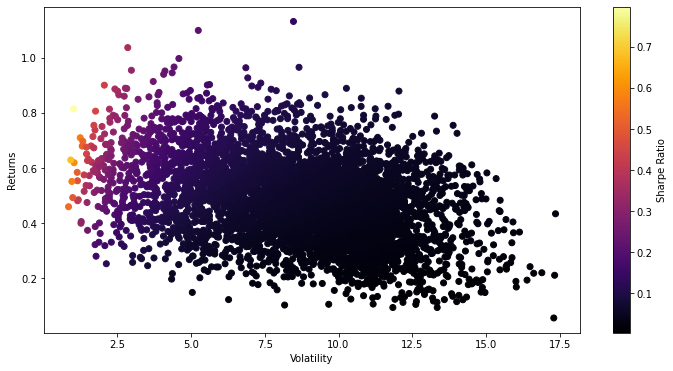

In [33]:
plt.figure(figsize = (12,6))
plt.scatter(portfolio_risk, portfolio_returns, c = portfolio_returns / portfolio_risk, cmap = 'inferno')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label = 'Sharpe Ratio')
plt.show()